<a href="https://colab.research.google.com/github/Brunapupo/machine-learning-classificacao-sklearn/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#atualização do seaborn

!pip install seaborn==0.9.0

In [3]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado',
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


 🔨 **A coluna nao_finalizado pode gerar confusões, afinal 0 seriam os projetos finalizados e 1 os não finalizados. Organizei as features com mais clareza de forma a evitar erros no desenvolvimento do projeto.**

**Criei uma nova coluna chamada finalizados, e troquei os valores 0 e 1, invertendo a função deles nesta coluna. Por fim, a troca de valores usando map(troca).**

In [5]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


**⏩ A ideia não é fazer um gráfico muito preciso, mas apenas apreender visualmente algumas informações. É possível perceber, por exemplo, que a medida em que os projetos vão ficando mais caros, os agrupamentos diminuem.**

<Axes: xlabel='horas_esperadas', ylabel='preco'>

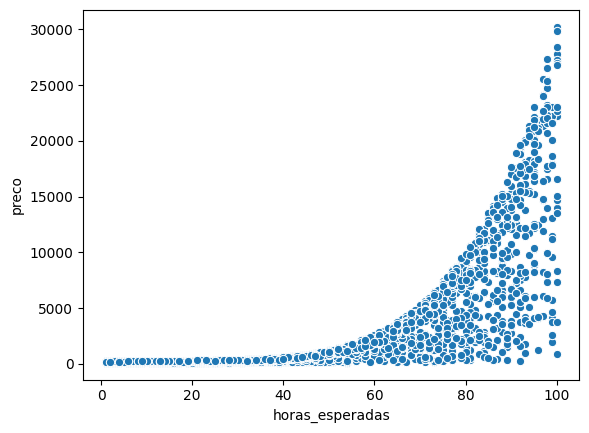

In [6]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

**⏩ Explorando quais projetos foram finalizados ou não.**

**- Existem várias maneiras de tentarmos visualizar as duas classes (0 ou 1 para finalizado) no gráfico. Uma delas é por meio de cores. Utilizaremos a mesma estrutura do método scatterplot, mas dessa vez passando o parâmetro hue, que será baseado na coluna finalizado, pintando os pontos de acordo com a classe atribuída à essa coluna:**

<Axes: xlabel='horas_esperadas', ylabel='preco'>

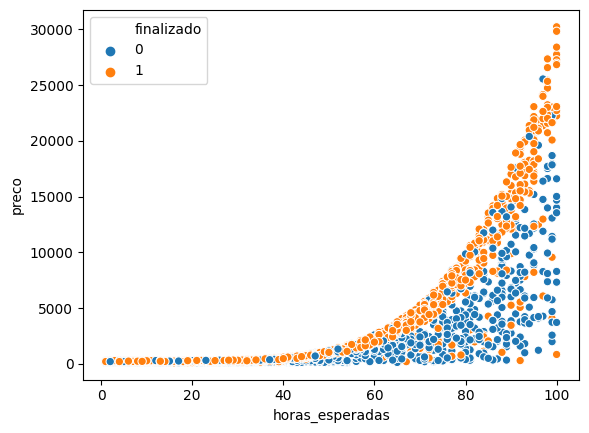

In [7]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

**✅ Uma outra alternativa é realizar uma plotagem relativa por meio de relplot(). Com esse método, ao invés das cores, queremos plotar os dados em colunas (col) diferentes, uma para os projetos finalizados e outra para os não-finalizados:**

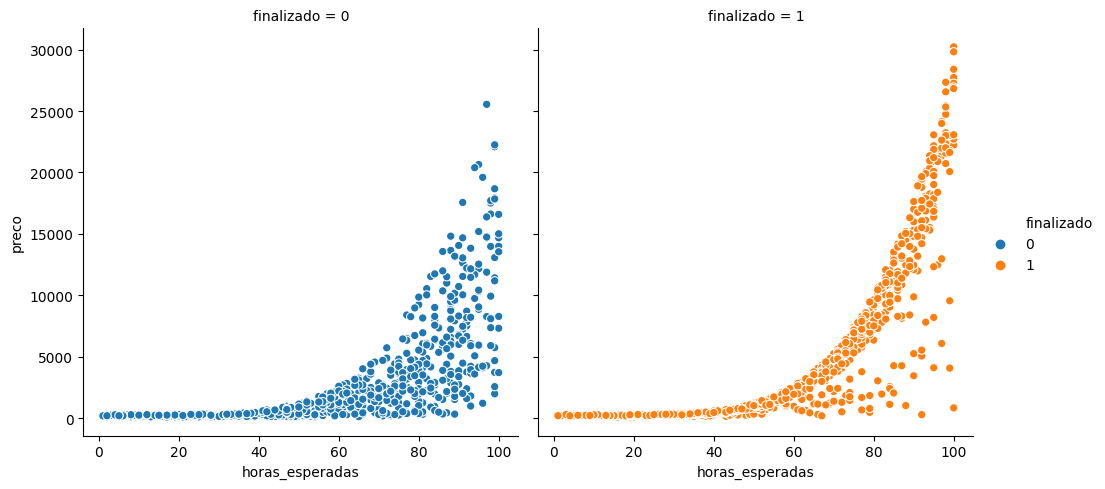

In [8]:
sns.relplot(x="horas_esperadas", y="preco",hue='finalizado', col="finalizado", data=dados)

# **✨ Modalagem**

**- dados no eixo x, que são as colunas horas_esperadas e preco. Em seguida, o eixo y, referente à coluna finalizado.**


In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados ['finalizado']

# **✨ Separando dados de treino e teste**

**- Agora desenvolvi um modelo, separei os dados de treino e teste, treinei efetivamente o modelo e por fim verifiquei a taxa de acerto.**

**- Realizei o train_test_split() para dividir os dados de teste e de treino, com o tamanho de 0.25 (25%) para o teste; estratificando esses dados de acordo com as classes; criando nosso modelo LinearSVC; treinando esse modelo; prevendo os resultados e testando a acurácia do estimador.**

**Ao executar o código, teremos o seguinte resultado:**

**Trenei com 1617 elementos e testei com 540 elementos**

## **✅ A acurácia foi 54.26%**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.22%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**⏩ - Para saber se a acurácia é boa ou ruim, devemos ter um recurso comparativo. Inventei um algoritmo bem simples  que terá como previsão que todos os projetos são finalizados, isto é, os 540 elementos de teste serão 1.**

**🟩 Com o Numpy, a biblioteca que gera matrizes, faremos com que 540 elementos tenham o valor 1. Feito isso, estipularemos que essas são as previsões, as chamaremos de previsoes_de_base, e testaremos sua acurácia.**

In [11]:
import numpy as np

previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


# **A acurácia da Bruna foi 52.59%**

**Ou seja, com esse algoritmo simples, tive um resultado de 52.59% - um valor muito próximo ao do algoritmo anterior, com uma diferença de apenas 1,67%. Isto é, ele é pouco melhor do que sempre prever 1.**

**⏩ Agora iremos analisar cada uma das classificações que realizamos. Para isso, copiaremos o mesmo código de scatterplot() que utilizamos anteriormente, mas, ao invés de dados, usaremos teste_x. Também precisaremos alterar o campo que serve de parâmetro para hue - no caso, teste_y.**

<Axes: xlabel='horas_esperadas', ylabel='preco'>

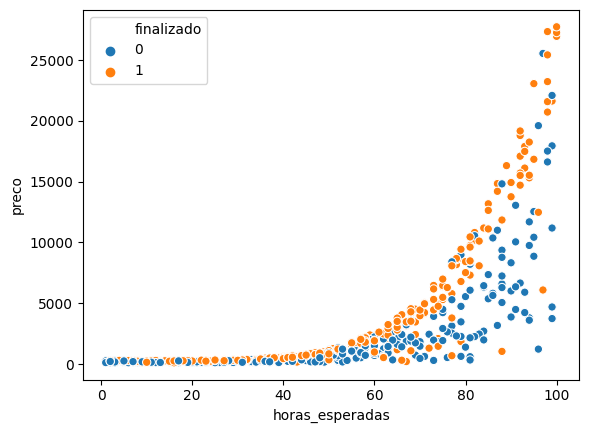

In [12]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)


**⏩ Peguei os valores pixel a pixel e rodei no algoritmo, de acordo com a respota do algoritmo eu pinto de uma certa cor.**

In [13]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


**⏩ O x está indo de 1 a 100, enquanto y varia de 101 a 27738. Agora definiremos quantos pixels haverá em cada dimensão; se multiplicamos 100 x 100, isto é, 100 pixels para cada dimensão (altura e largura), teremos um total de 10.000 pontos, o que é o suficiente.**

**Entre x_min e x_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels ((x_max - x_min)/pixels.**

**Por fim, adicionaremos o método arange() da biblioteca do Numpy.**

In [14]:
# Gerando matrix de pixels
pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

**⏩ A partir de 1, foram realizadas somas de 0.99 até chegar ao número 99.01, dividindo proporcionalmente o espaço do eixo_x no gráfico. Faremos o mesmo procedimento para o eixo_y, aproveitando para nomear cada uma dessas operações:**

In [15]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

**⏩ Criar uma grid entre os dois eixos, multiplicando as opções de acordo com as diferentes possibilidade de custo de projeto e tempo de execução.**

**a biblioteca do Numpy o np.meshgrid(), que consegue mesclar um grid .**


In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

**⏩ Com o código estruturado desta maneira, o que temos é a repetição do eixo x 100 vezes, e o mesmo ocorre com eixo y. Ou seja, ainda não foi  mesclado realmente esses dados. Para fazerisso, usei o xx.ravel():**

**⏩ Faremos o mesmo procedimento para yy, e então concatenaremos xx e yy por meio de np.c_. Essa operação nos devolverá os pontos.**

In [17]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

**⏩ Fazendo previsões a partir do modelo predict() para todos esses pontos.**

In [18]:
Z = modelo.predict(pontos)
Z.shape
xx.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(100, 100)

**⏩ redimensionar (reshape) o array de 10000 de acordo com xx.**

In [19]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

**⏩ Plotando os dados, usei a biblioteca Matplotlib, cujas importações costumam ser plt.**

**- Para ter os pontos espalhados usei o scatterplot() do Seaborn pois, nesse caso, terá um controle mais refinado dessa plotagem.**

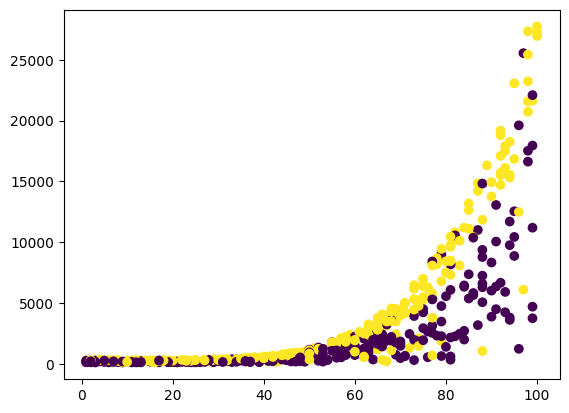

In [20]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)


**⏩ Para reduzir o tamanho dos pontos e melhorar a visualização dos dados, usei o parâmetro s=1 (de size):**

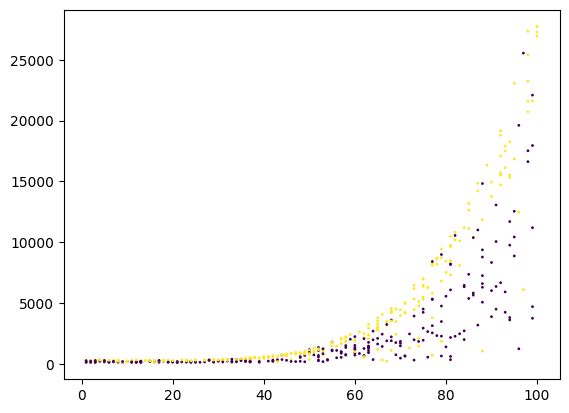

In [21]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

**Após criar o plot básico, realizei a classificação:**

**- se o valor for 0, pintaremos de uma cor, se for 1, de outra.**

**- Adicionei números cores diferentes entre números, para visualizar a curva que separa as duas classificações do algoritmo.**

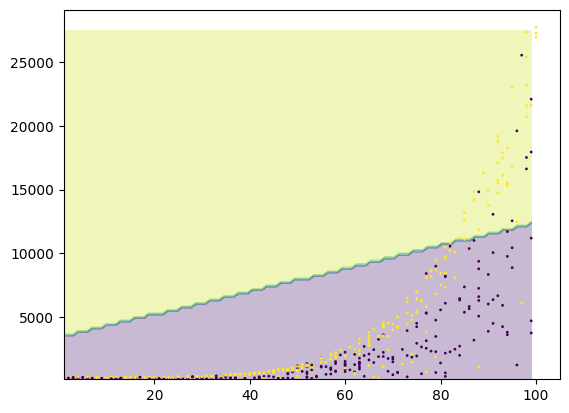

In [22]:
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

plt.show()

#DECISION BOUNDARY


**✅  - Plot Inicial: Gráfico de dispersão criado.**

**- Definição dos Eixos:** Limites dos eixos estabelecidos.

**- Distribuição de Pixels:** Espaçamento entre pixels calculado.

**- Criação de Grid:** Grade para mapeamento construída.

**- Previsões do Modelo:** Classificações do modelo obtidas.

**- Redimensionamento das Previsões:** Ajuste das previsões à grade.

**- Plotagem Final:** Representação visual finalizada.